In [14]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve


#load dataset
dt=pd.read_csv("KNNAlgorithmDataset.csv")
print('Successfully read! ')

Successfully read! 


In [15]:
# Display the first few rows of the dataset
print(dt.head())

# Summary of the dataset
print(dt.info())

# Summary statistics for numeric columns
print(dt.describe())

# Check for missing values
print(dt.isnull().sum())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [16]:
#cleaning the dataset
dt=dt.drop(columns=['Unnamed: 32'])

In [17]:
#Preparing the data for further training
X=dt.drop(['id','diagnosis'],axis=1)
y=dt['diagnosis']



In [18]:
# Display the first few rows of the features and target
print("Feature Set:")
print(X.head())

print("\nTarget Variable:")
print(y.head())

# Basic stats of the features
print("\nFeature Summary:")
print(X.describe())


Feature Set:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \

In [19]:
# Checking for missing values in the features
print("\nMissing Values in Features:")
print(X.isnull().sum())

# Checking for missing values in the target
print("\nMissing Values in Target:")
print(y.isnull().sum())



Missing Values in Features:
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Missing Values in Target:
0


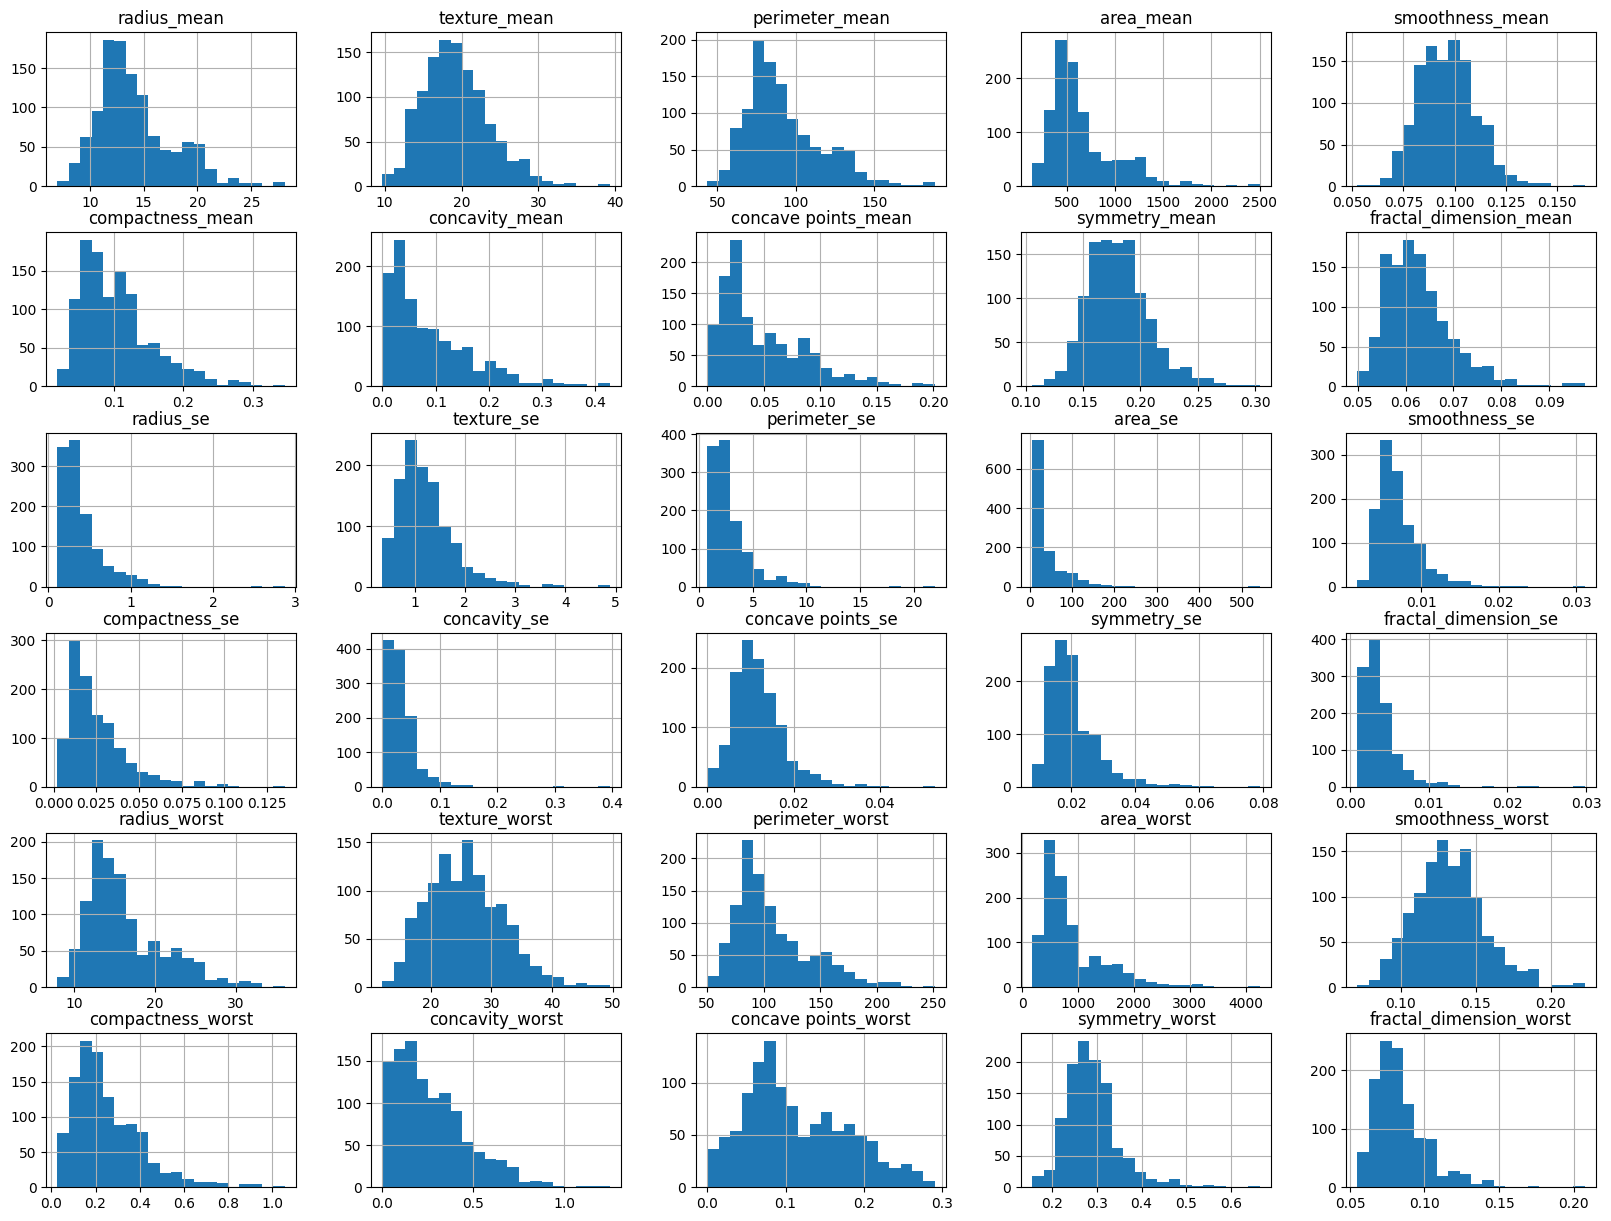

In [20]:
# Histograms of the features
X.hist(bins=20, figsize=(20, 15))
plt.show()


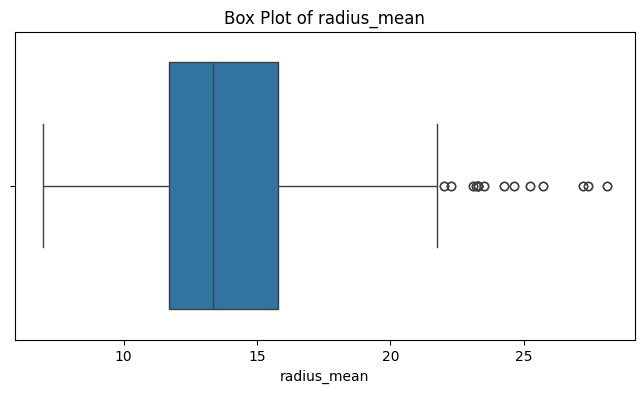

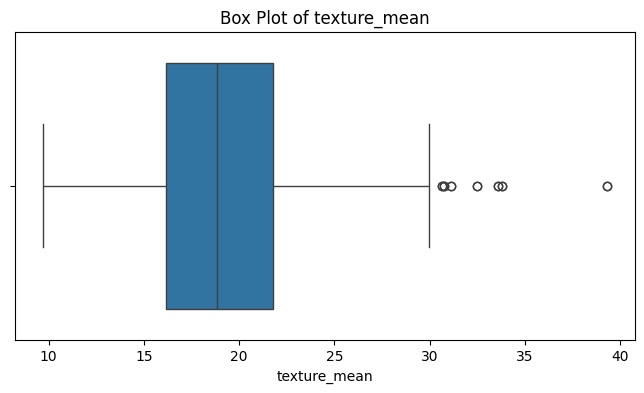

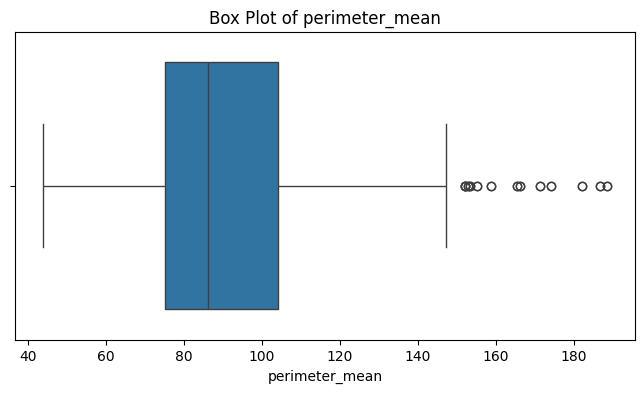

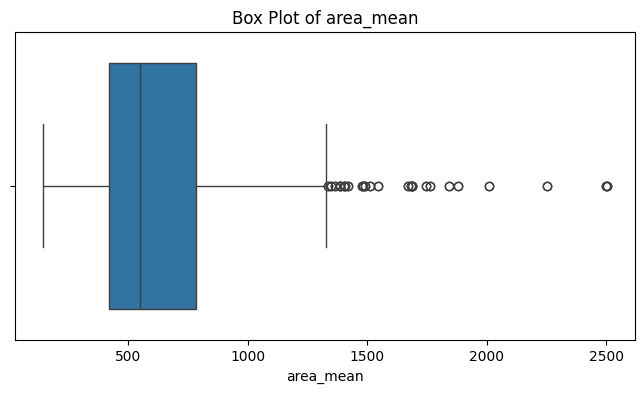

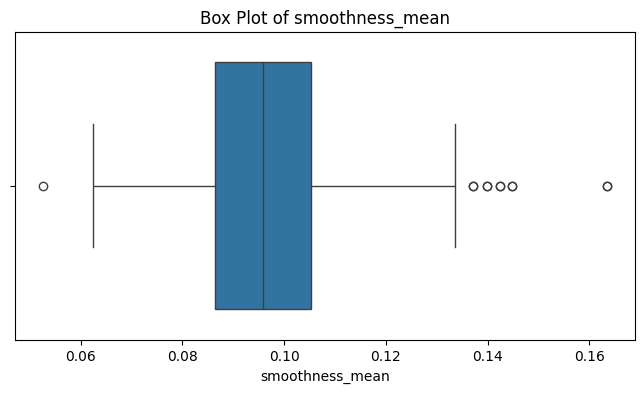

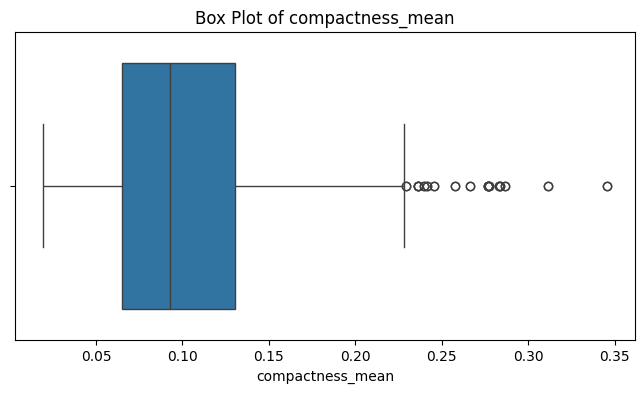

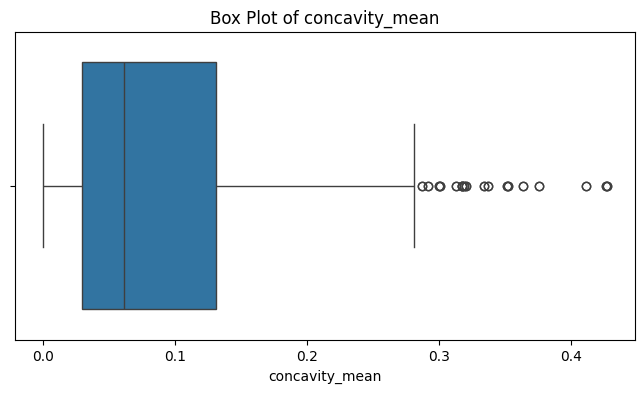

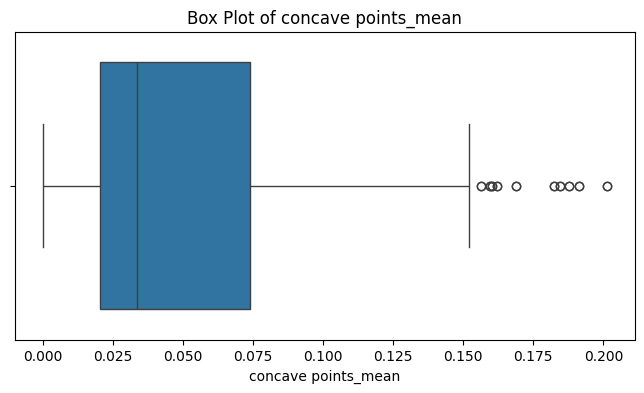

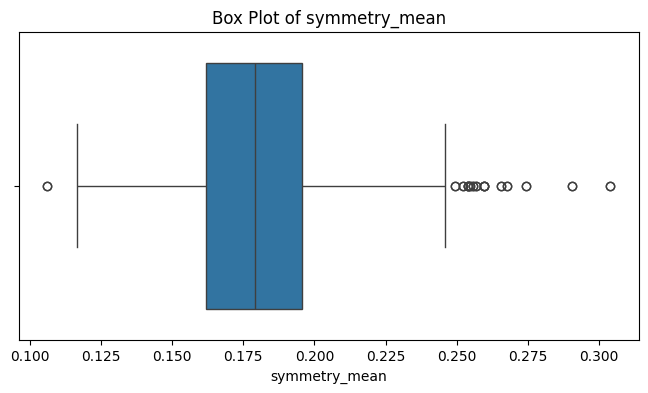

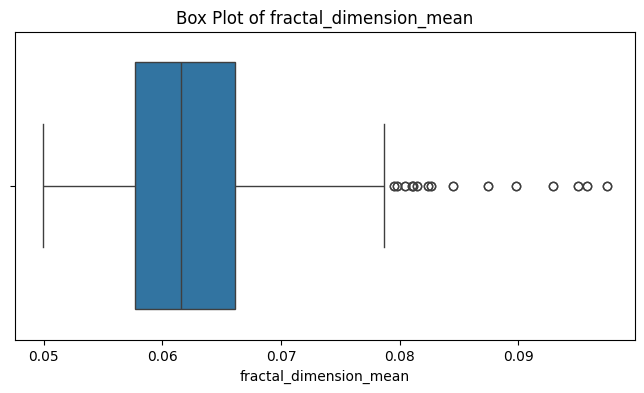

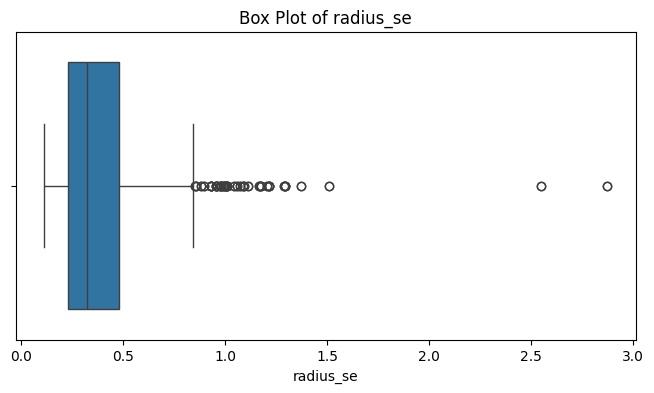

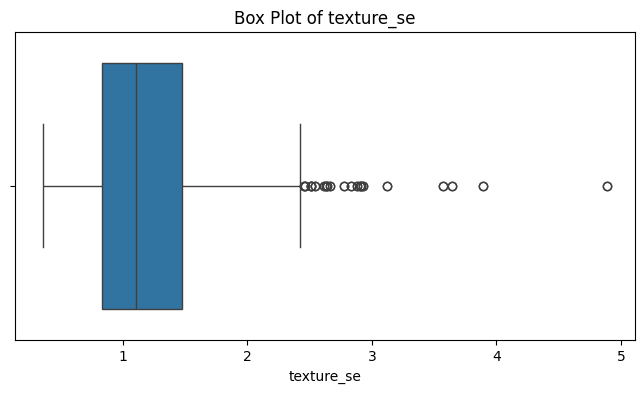

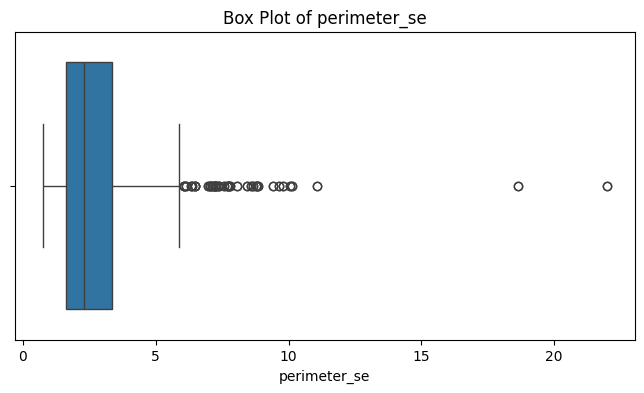

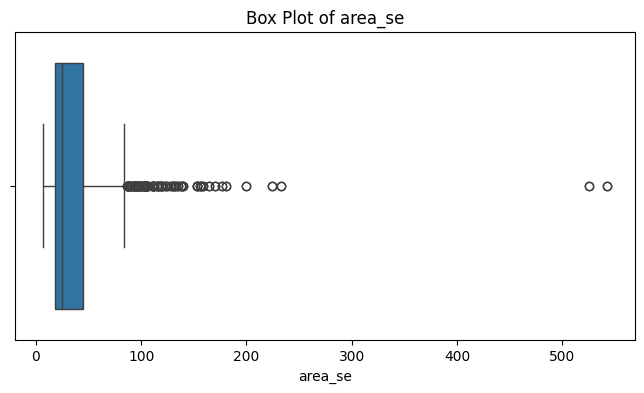

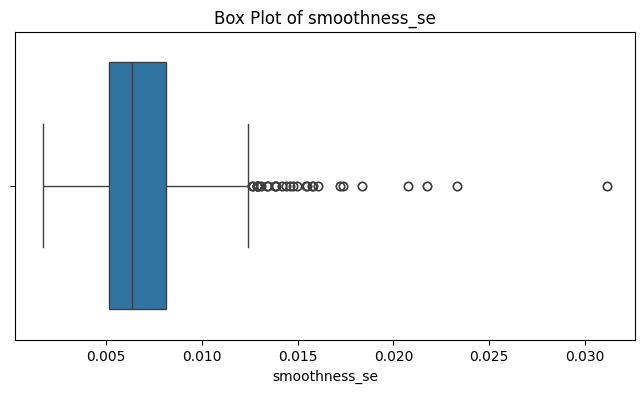

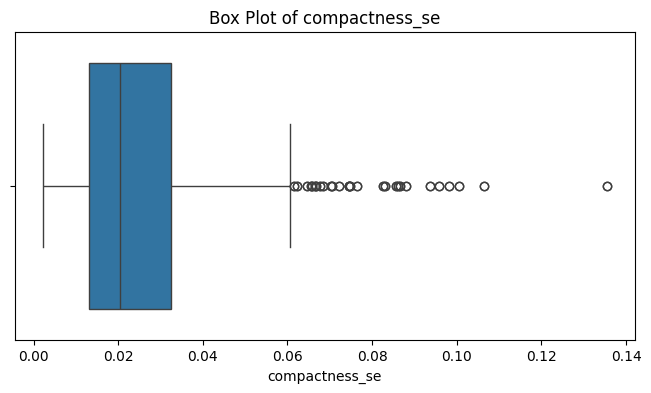

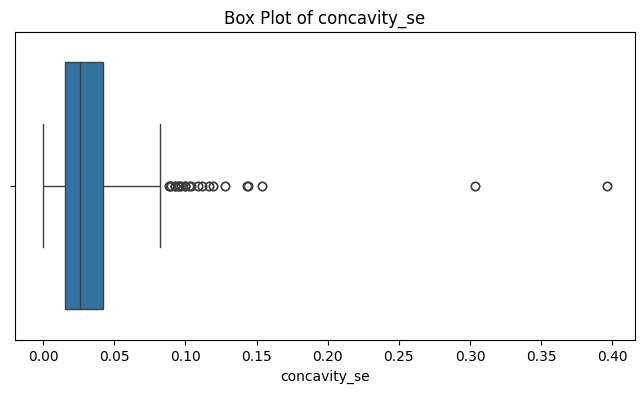

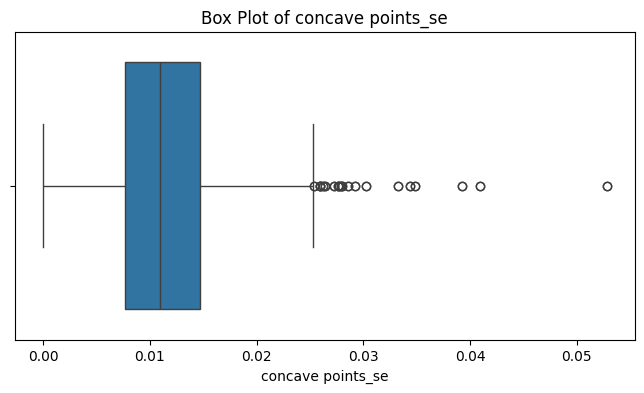

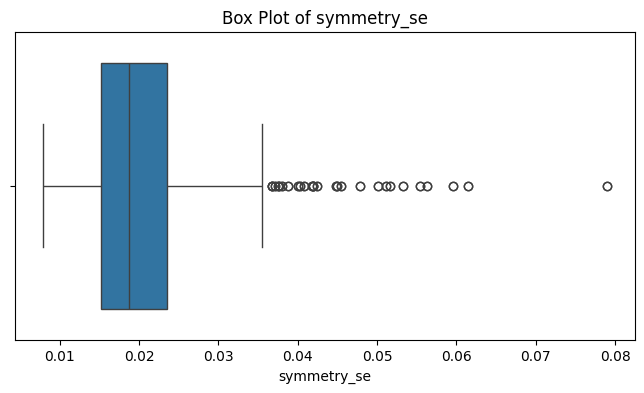

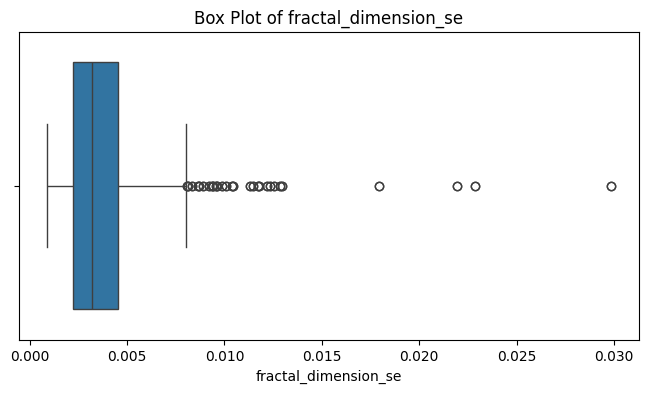

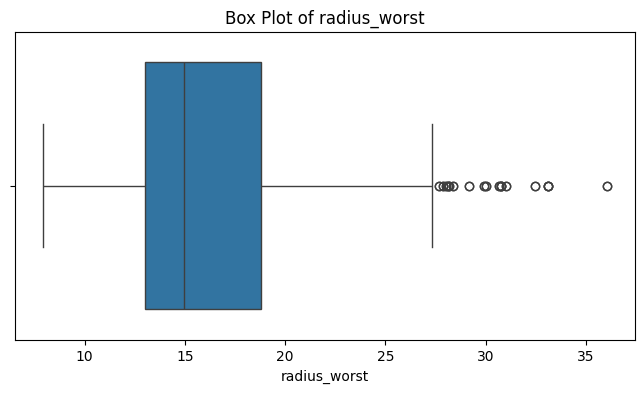

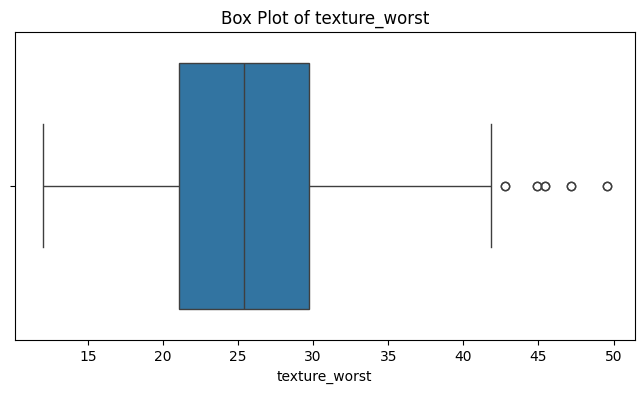

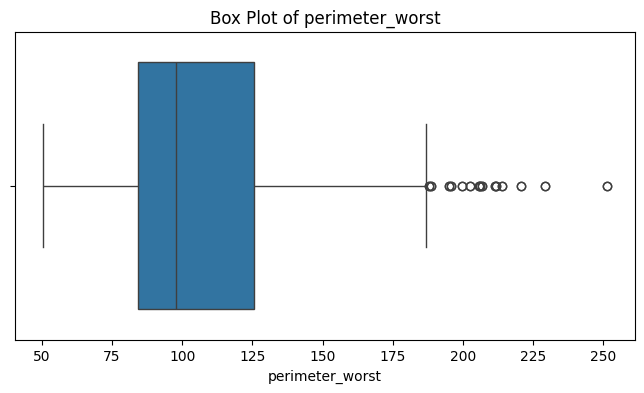

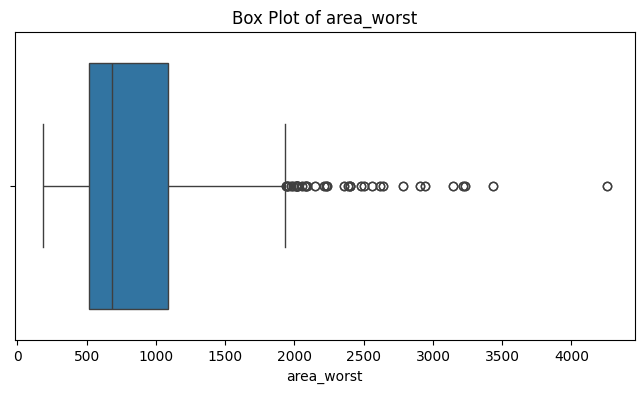

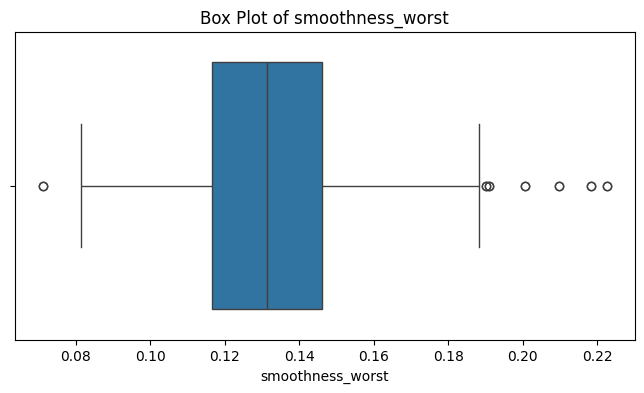

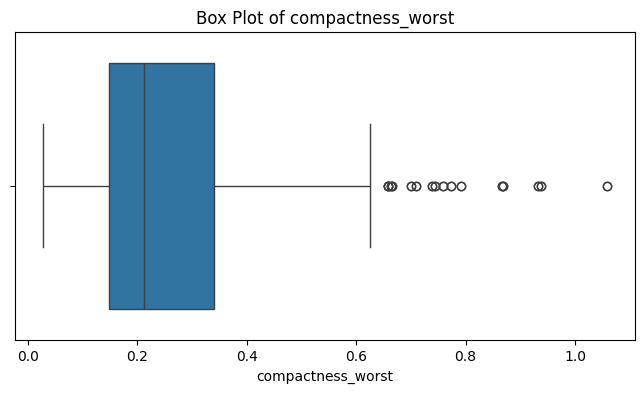

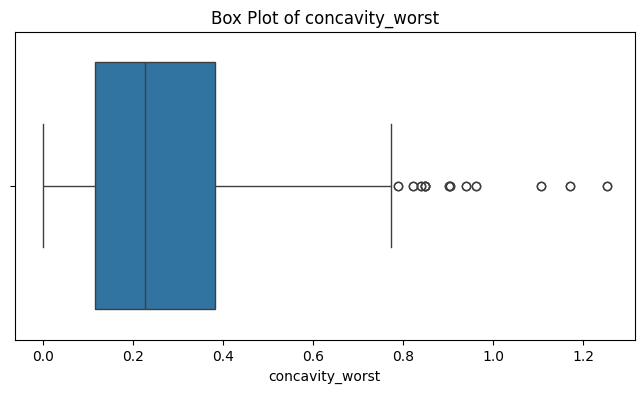

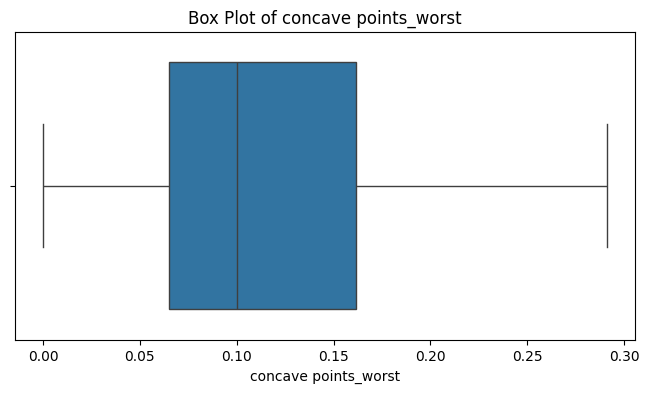

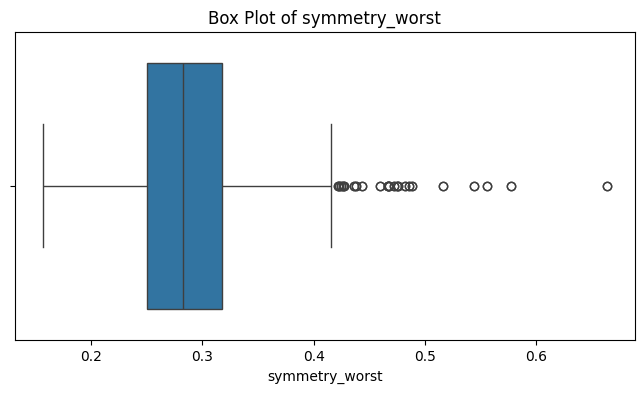

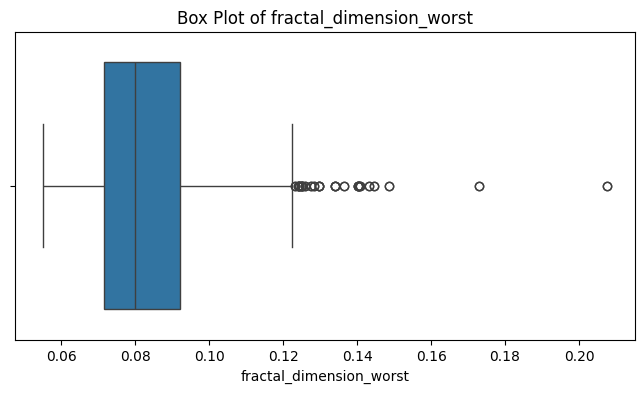

In [21]:
# Box plots for each feature to identify outliers
for column in X.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=X[column])
    plt.title(f'Box Plot of {column}')
    plt.show()


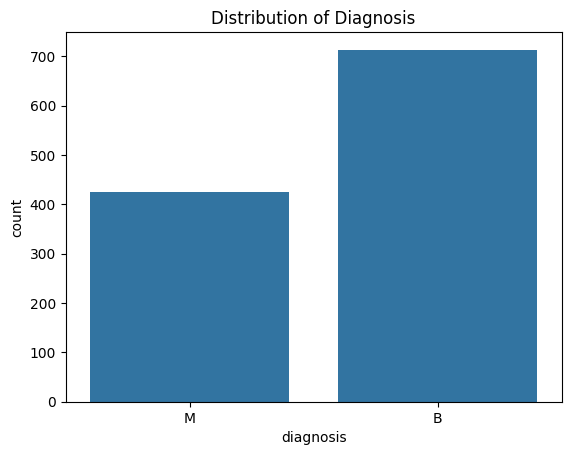

In [22]:
sns.countplot(x=y)
plt.title('Distribution of Diagnosis')
plt.show()


In [23]:
#Converting M and B to 1 and 0
y.replace(['M','B'],[1,0],inplace=True)



C:\Users\Al-Hussain Com\AppData\Local\Temp\ipykernel_1732\488975481.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.replace(['M','B'],[1,0],inplace=True)


In [24]:


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors for KNN
knn.fit(X_train, y_train)

# Predicting the test set results
y_pred = knn.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9868421052631579

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       156
           1       0.99      0.97      0.98        72

    accuracy                           0.99       228
   macro avg       0.99      0.98      0.98       228
weighted avg       0.99      0.99      0.99       228



In [25]:

# Range of 'k' to test
k_range = range(1, 31)

# List to store the average accuracy for each value of 'k'
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')  # 10-fold cross-validation
    k_scores.append(scores.mean())

# Find the value of 'k' that has the maximum score
best_k = k_range[k_scores.index(max(k_scores))]
print("Best k:", best_k)


Best k: 1


In [26]:
# Rebuilding the KNN model with K=7
knn_optimized = KNeighborsClassifier(n_neighbors=7)
knn_optimized.fit(X_train, y_train)
y_pred_optimized = knn_optimized.predict(X_test)

# Evaluating the optimized model
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print("Optimized Accuracy:", accuracy_optimized)
print("\nOptimized Classification Report:\n", classification_report(y_test, y_pred_optimized))


Optimized Accuracy: 0.9824561403508771

Optimized Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       156
           1       0.97      0.97      0.97        72

    accuracy                           0.98       228
   macro avg       0.98      0.98      0.98       228
weighted avg       0.98      0.98      0.98       228



In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Configuring the KNeighborsClassifier with specified parameters
knn = KNeighborsClassifier(n_neighbors=11, weights='distance', algorithm='ball_tree', metric='euclidean')
knn.fit(X_train, y_train)

# Predicting the test set results
y_pred = knn.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with specified parameters:", accuracy)

# Since you know the parameters, there's no need for grid search or training score calculations


Accuracy with specified parameters: 1.0


In [28]:
#Calculating F1-Score now
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_best, average='weighted')

1.0

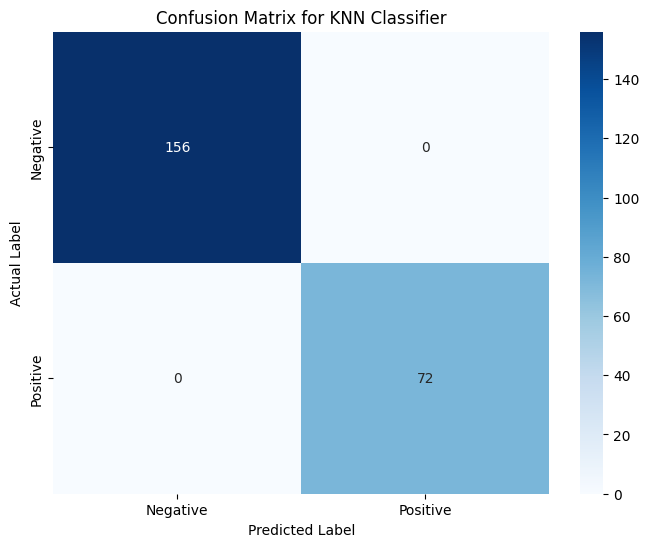

In [29]:

# Generate the confusion matrix from the true labels and predicted labels
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Plotting the confusion matrix using Seaborn's heatmap function
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for KNN Classifier')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


In [30]:
train_sizes, train_scores, validation_scores = learning_curve(
    estimator = KNeighborsClassifier(n_neighbors=best_k), # Use the best k from previous findings
    X = X_train, 
    y = y_train, 
    train_sizes = np.linspace(0.1, 1.0, 10), # Use 10 increments from 10% to 100% of the training data
    cv = 5, # Cross-validation splitting strategy
    scoring = 'accuracy', # Evaluation metric
    n_jobs = -1 # Use all available cores
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)


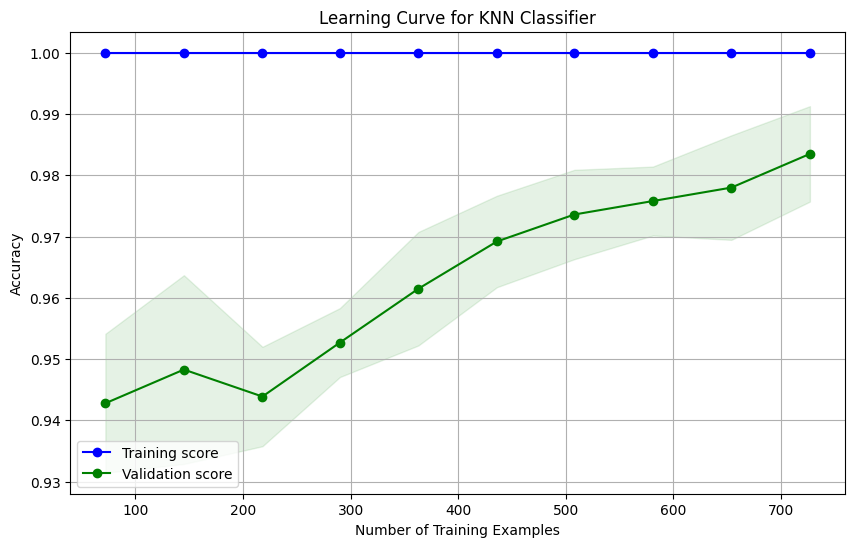

In [31]:
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color='green', alpha=0.1)

plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, validation_mean, 'o-', color='green', label='Validation score')

plt.title('Learning Curve for KNN Classifier')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()
